In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import kaepora as kpora
import kaepora_plot as kplot
import numpy as np
import spectral_analysis as sa

In [5]:
ssfr_all = "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase and ((dm15_source >= .7 and dm15_source < 1.8) or (dm15_from_fits >= .7 and dm15_from_fits < 1.8))"

In [6]:
ssfr_array = kpora.grab(ssfr_all, multi_epoch = False, make_corr = True, verbose=True)


Using: ../data/kaepora_v1_DEV.db
3661 Total Spectra found
116 flagged spectra removed 3545 spectra left
82 spectra of peculiar Ias removed 3463 spectra left
281 spectra of SNe that have host reddening corrections
Arrays cleaned
Name Filename Source SNR Phase MJD MJD_max z Host Morphology Minwave Maxwave
1989b sn1989b-19890427-o1i1.flm bsnip 56.3399611556 78.2981270419 47643.0 47564.512 0.002425 12.0 3346.0 8978.0
1990n sn1990n-19900731-oi.flm bsnip 246.978555483 21.4830649943 48103.193 48081.637 0.003395 13.0 3940.0 9816.0
1990o sn1990o-19900717-opt2.flm bsnip 67.146111096 12.5753882934 48089.0 48076.039 0.030664 11.0 3856.0 6818.0
1990y sn1990y-19900830-opt2.flm bsnip 5.49031052791 18.9579936749 48133.51 48113.812 0.039034 None 3844.0 6734.0
1991m sn1991m-19910407-final.flm bsnip 87.6428174913 17.8012082583 48353.0 48335.07 0.007235 14.0 3906.0 6898.0
1991s sn1991s-19910505-final.flm bsnip 0.0252803734457 31.8629659169 48381.0 48347.402 0.054453 19.0 3752.0 6588.0
1991t sn1991t-199204

2006or sn2006or-20061201.530-ui.flm bsnip 32.770383588 2.01074814914 54070.53 54068.477 0.021013 13.0 3294.0 9990.0
2006os sn2006os-20061201.142-ui.flm bsnip 20.3144995246 7.27433630032 54070.142 54062.629 0.032809 19.0 3258.0 10116.0
2006ot sn2006ot-20061201.241-ui.flm bsnip 12.9410415701 5.09543253252 54070.241 54064.875 0.0531 10.0 3192.0 9920.0
2006qo sn2006qo-20061201.436-ui.flm bsnip 31.4026898525 -10.9912611419 54070.436 54081.762 0.030455 15.0 3266.0 10138.0
2006s sn2006s-20060130.375-ui.flm bsnip 26.3049189109 -4.08777427037 53765.375 53769.594 0.032102 19.0 3280.0 10220.0
2006sr sn2006sr-20061220.097-ui.flm bsnip 69.4133466129 -2.54847970004 54089.097 54091.707 0.02414 19.0 3284.0 10202.0
2006td sn2006td-20070121.218-ui.flm bsnip 0.31141194741 22.33236209 54121.218 54098.531 0.01588 None 3388.0 10372.0
2006te sn2006te-20070121.393-ui.flm bsnip 0.304148018379 24.3429572932 54121.393 54096.281 0.031592 None 3278.0 10224.0
2006x sn2006x-20060626.243-ui.flm bsnip 0.195079175966 1

In [22]:
names = []
ssf = []
nssf = []
values = []
for i, spec in enumerate(ssfr_array):
    names.append(spec.name)
    if spec.other_meta_data["globalssfr"]:
        ssf.append(spec.name)
        values.append(spec.other_meta_data["globalssfr"])
    else:
        nssf.append(spec.name)
        
for n in nssf:
    print n
names = set(names)
print len(names)
print len(ssf), len(nssf)

1989b
1991m
1991t
1992g
1993ac
1993ae
1994d
1994s
1995ak
1995d
1995e
1996ai
1996bv
1997br
1997cw
1997e
1997y
1998bp
1998bu
1998dm
1998dx
1998ec
1998es
1998v
1999aa
1999ac
1999cl
1999cw
1999dk
1999ee
1999ek
1999gd
1999gh
2000bk
2000ce
2000fa
2001bf
2001c
2001cp
2001ep
2001fh
2001g
2001gc
2001n
2001v
2002ar
2002bo
2002cd
2002dj
2002do
2002er
2002eu
2002fb
2002hu
2002hw
2002jy
2002kf
2003ai
2003d
2003k
2003kf
2003w
2004bg
2004dt
2004eo
2004fu
2005a
2005am
2005bo
2005el
2005ew
2005ki
2005ls
2005m
2006ax
2006br
2006bu
2006cc
2006cm
2006cp
2006cz
2006em
2006et
2006eu
2006gj
2006ha
2006hb
2006kf
2006le
2006lf
2006mp
2006os
2006td
2006x
2007ap
2007au
2007bc
2007bm
2007bz
2007ca
2007cg
2007ci
2007cp
2007if
2007le
2007on
2007qe
2007s
2008c
1995bd
1996ab
1996bo
1996x
1996z
1997dt
1998co
1999ej
2000b
2000e
2002es
2003cg
2008r
2005al
2006fw
2007ai
2007as
2007jh
2008bc
2008fp
1980n
1986g
1992a
asassn-14lp
2011iv
281
147 134


-10.69


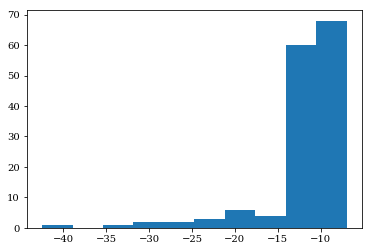

In [24]:
print np.median(values)
plt.hist(values)
plt.show()

In [39]:
ssfr_query = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and ((dm15_source >= .9 and dm15_source < 1.3) or (dm15_from_fits >= .9 and dm15_from_fits < 1.3)) and globalssfr < -10.7",
              "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and ((dm15_source >= 1. and dm15_source < 1.3) or (dm15_from_fits >= 1. and dm15_from_fits < 1.3)) and globalssfr > -10.7"]


In [42]:
composites, sn_arrays, boot_sn_arrays = kpora.make_composite(ssfr_query, boot=True, medmean=1, verbose=False, gini_balance=True, combine=True)


SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and ((dm15_source >= .9 and dm15_source < 1.3) or (dm15_from_fits >= .9 and dm15_from_fits < 1.3)) and globalssfr < -10.7
69 Total Spectra found
3 flagged spectra removed 66 spectra left
0 spectra of peculiar Ias removed 66 spectra left
66 spectra of SNe that have host reddening corrections
Arrays cleaned
0 spectra may have telluric contamination
30 total SNe
removed spectra of SNe with A_V > 2.0
Using 66 spectra of 30 SNe
Gini balancing...
Balanced after 16 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and ((dm15_source >= 1. and dm15_source < 1.3) or (dm15_from_fits >= 1. and dm15_from_fits < 1.3)) and globalssfr > -10.7
95 Total Spectra found
4 flagged spectra removed 91 spectra left
0 spectra of peculiar Ias removed 91 spectra left
80 s

In [43]:
# for spec in sn_arrays[0]:
#     print spec.name

Phase:  0.5517048808359194
dm15:  1.118956855671634
Redshift:  0.021031685364066306
HR:  -0.05905463316695456
Phase:  0.3768075748927907
dm15:  1.1017327481949855
Redshift:  0.012636850083638395
HR:  nan


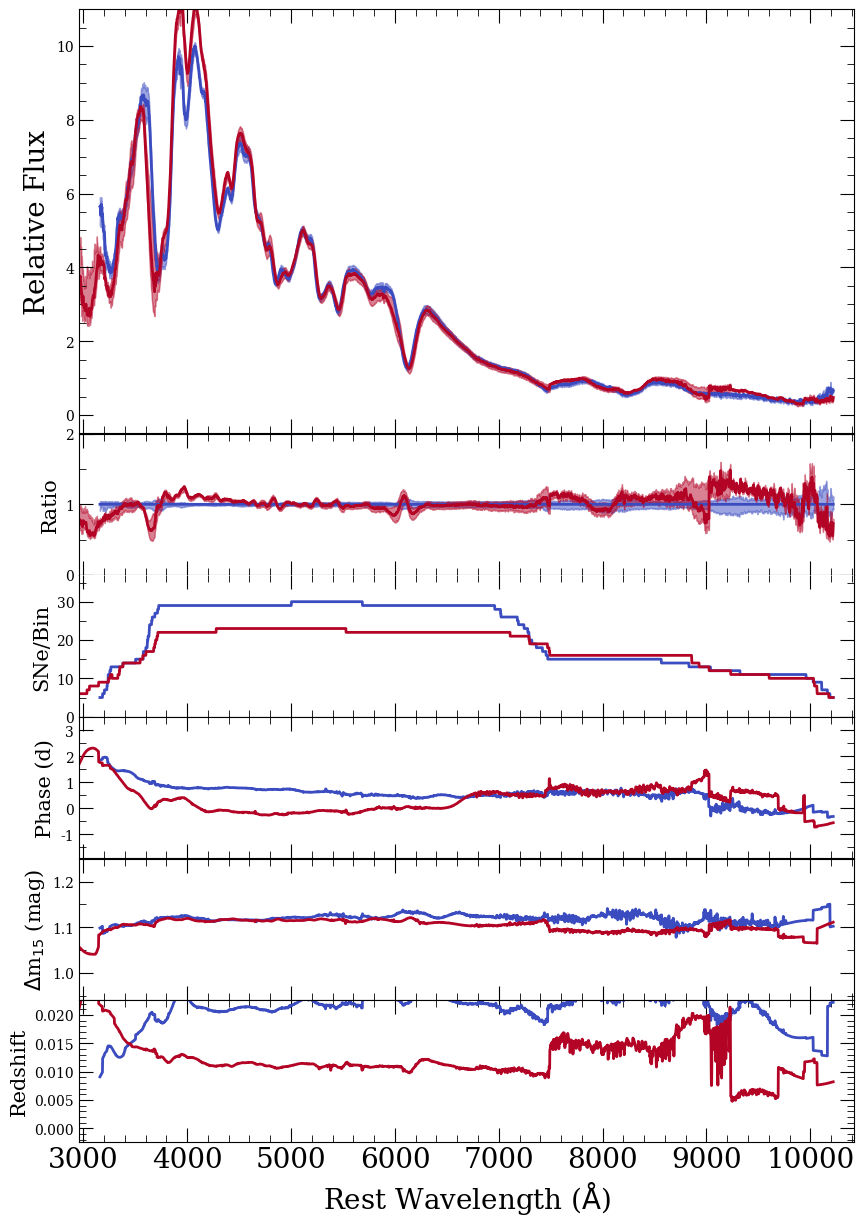

In [44]:
kpora.set_min_num_spec(composites, 5)
kplot.comparison_plot(composites, scale_type=False, min_num_show=5)

In [105]:
query_strings_lowssfr = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= .8 and dm15_source < 1.4) or (dm15_from_fits >= .8 and dm15_from_fits < 1.4)) and globalssfr between -17 and -10.7"]
max_phase = 50.
p1 = -10.
k = 4.
p2 = p1+k
while p1 < max_phase:
    query_strings_lowssfr.append("SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= %f and phase < %f and ((dm15_source >= .8 and dm15_source < 1.4) or (dm15_from_fits >= .8 and dm15_from_fits < 1.4)) and globalssfr between -17 and -10.7"% (p1,p2))
    p1 += k
    p2 += k
for q in query_strings_lowssfr:
    print q

SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= .8 and dm15_source < 1.4) or (dm15_from_fits >= .8 and dm15_from_fits < 1.4)) and globalssfr between -17 and -10.7
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -10.000000 and phase < -6.000000 and ((dm15_source >= .8 and dm15_source < 1.4) or (dm15_from_fits >= .8 and dm15_from_fits < 1.4)) and globalssfr between -17 and -10.7
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -6.000000 and phase < -2.000000 and ((dm15_source >= .8 and dm15_source < 1.4) or (dm15_from_fits >= .8 and dm15_from_fits < 1.4)) and globalssfr between -17 and -10.7
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -2.000000 and phase < 2.000000 and ((dm15_source >= .8 and dm15_source < 1.4) or (dm15_from_fits >= .8 and dm15_from_fits < 1.4)) and globalssfr between -17 and -10.7
SELECT * from Spectra inner join Events 

In [106]:
query_strings_highssfr = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= .8 and dm15_source < 1.4) or (dm15_from_fits >= .8 and dm15_from_fits < 1.4)) and globalssfr > -10.7"]
max_phase = 50.
p1 = -10.
k = 4.
p2 = p1+k
while p1 < max_phase:
    query_strings_highssfr.append("SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= %f and phase < %f and ((dm15_source >= .8 and dm15_source < 1.4) or (dm15_from_fits >= .8 and dm15_from_fits < 1.4)) and globalssfr > -10.7"% (p1,p2))
    p1 += k
    p2 += k
for q in query_strings_highssfr:
    print q

SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= .8 and dm15_source < 1.4) or (dm15_from_fits >= .8 and dm15_from_fits < 1.4)) and globalssfr > -10.7
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -10.000000 and phase < -6.000000 and ((dm15_source >= .8 and dm15_source < 1.4) or (dm15_from_fits >= .8 and dm15_from_fits < 1.4)) and globalssfr > -10.7
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -6.000000 and phase < -2.000000 and ((dm15_source >= .8 and dm15_source < 1.4) or (dm15_from_fits >= .8 and dm15_from_fits < 1.4)) and globalssfr > -10.7
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -2.000000 and phase < 2.000000 and ((dm15_source >= .8 and dm15_source < 1.4) or (dm15_from_fits >= .8 and dm15_from_fits < 1.4)) and globalssfr > -10.7
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 2.000000 and phas

In [107]:
composites_highssfr, sn_arrays_highssfr, boot_sn_arrays_highssfr = kpora.make_composite(query_strings_highssfr, boot=True, medmean=1, verbose=False, gini_balance=True, combine=True)


SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= .8 and dm15_source < 1.4) or (dm15_from_fits >= .8 and dm15_from_fits < 1.4)) and globalssfr > -10.7
40 Total Spectra found
1 flagged spectra removed 39 spectra left
0 spectra of peculiar Ias removed 39 spectra left
37 spectra of SNe that have host reddening corrections
Arrays cleaned
37 spectra may have telluric contamination
12 total SNe
removed spectra of SNe with A_V > 2.0
Using 37 spectra of 12 SNe
Gini balancing...
Balanced after 12 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -10.000000 and phase < -6.000000 and ((dm15_source >= .8 and dm15_source < 1.4) or (dm15_from_fits >= .8 and dm15_from_fits < 1.4)) and globalssfr > -10.7
78 Total Spectra found
3 flagged spectra removed 75 spectra left
0 spectra of peculiar Ias removed 75 spectra left
69 spe

19 total SNe
removed spectra of SNe with A_V > 2.0
Using 32 spectra of 19 SNe
Gini balancing...
Balanced after 11 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 34.000000 and phase < 38.000000 and ((dm15_source >= .8 and dm15_source < 1.4) or (dm15_from_fits >= .8 and dm15_from_fits < 1.4)) and globalssfr > -10.7
23 Total Spectra found
0 flagged spectra removed 23 spectra left
0 spectra of peculiar Ias removed 23 spectra left
22 spectra of SNe that have host reddening corrections
Arrays cleaned
22 spectra may have telluric contamination
17 total SNe
removed spectra of SNe with A_V > 2.0
Using 22 spectra of 17 SNe
Gini balancing...
Balanced after 9 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 38.000000 and phase < 42.000000 and ((dm15_source >= .8 and

In [65]:
composites_lowssfr, sn_arrays_lowssfr, boot_sn_arrays_lowssfr = kpora.make_composite(query_strings_lowssfr, boot=True, medmean=1, verbose=False, gini_balance=True, combine=True)


SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= .8 and dm15_source < 1.4) or (dm15_from_fits >= .8 and dm15_from_fits < 1.4)) and globalssfr < -10.7
6 Total Spectra found
0 flagged spectra removed 6 spectra left
0 spectra of peculiar Ias removed 6 spectra left
6 spectra of SNe that have host reddening corrections
Arrays cleaned
0 spectra may have telluric contamination
4 total SNe
removed spectra of SNe with A_V > 2.0
Using 6 spectra of 4 SNe
Gini balancing...
Balanced after 2 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -10.000000 and phase < -6.000000 and ((dm15_source >= .8 and dm15_source < 1.4) or (dm15_from_fits >= .8 and dm15_from_fits < 1.4)) and globalssfr < -10.7
36 Total Spectra found
1 flagged spectra removed 35 spectra left
0 spectra of peculiar Ias removed 35 spectra left
35 spectra of S

0 spectra may have telluric contamination
18 total SNe
removed spectra of SNe with A_V > 2.0
Using 24 spectra of 18 SNe
Gini balancing...
Balanced after 4 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 34.000000 and phase < 38.000000 and ((dm15_source >= .8 and dm15_source < 1.4) or (dm15_from_fits >= .8 and dm15_from_fits < 1.4)) and globalssfr < -10.7
12 Total Spectra found
0 flagged spectra removed 12 spectra left
0 spectra of peculiar Ias removed 12 spectra left
12 spectra of SNe that have host reddening corrections
Arrays cleaned
0 spectra may have telluric contamination
11 total SNe
removed spectra of SNe with A_V > 2.0
Using 12 spectra of 11 SNe
Gini balancing...
Balanced after 1 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 38.000000 and phase

Phase:  -11.40185386965908
dm15:  0.9240952042060172
Redshift:  0.022553581181273073
HR:  nan
Phase:  -11.34481298646495
dm15:  1.0778016504137349
Redshift:  0.00675177327970184
HR:  nan


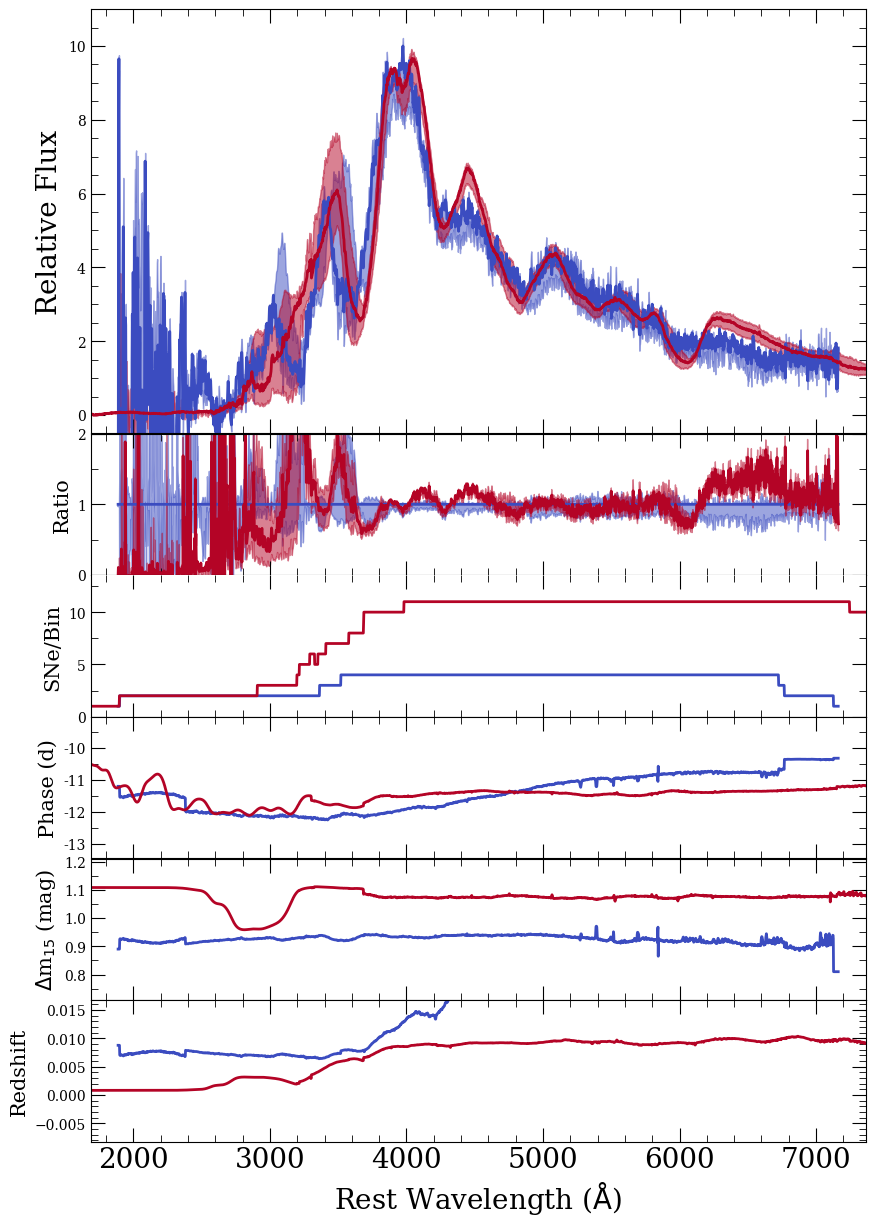

Phase:  -7.643894769295732
dm15:  1.0927791313684474
Redshift:  0.01891653340399337
HR:  nan
Phase:  -7.702869983772351
dm15:  1.0399205000560718
Redshift:  0.013611540289734592
HR:  nan


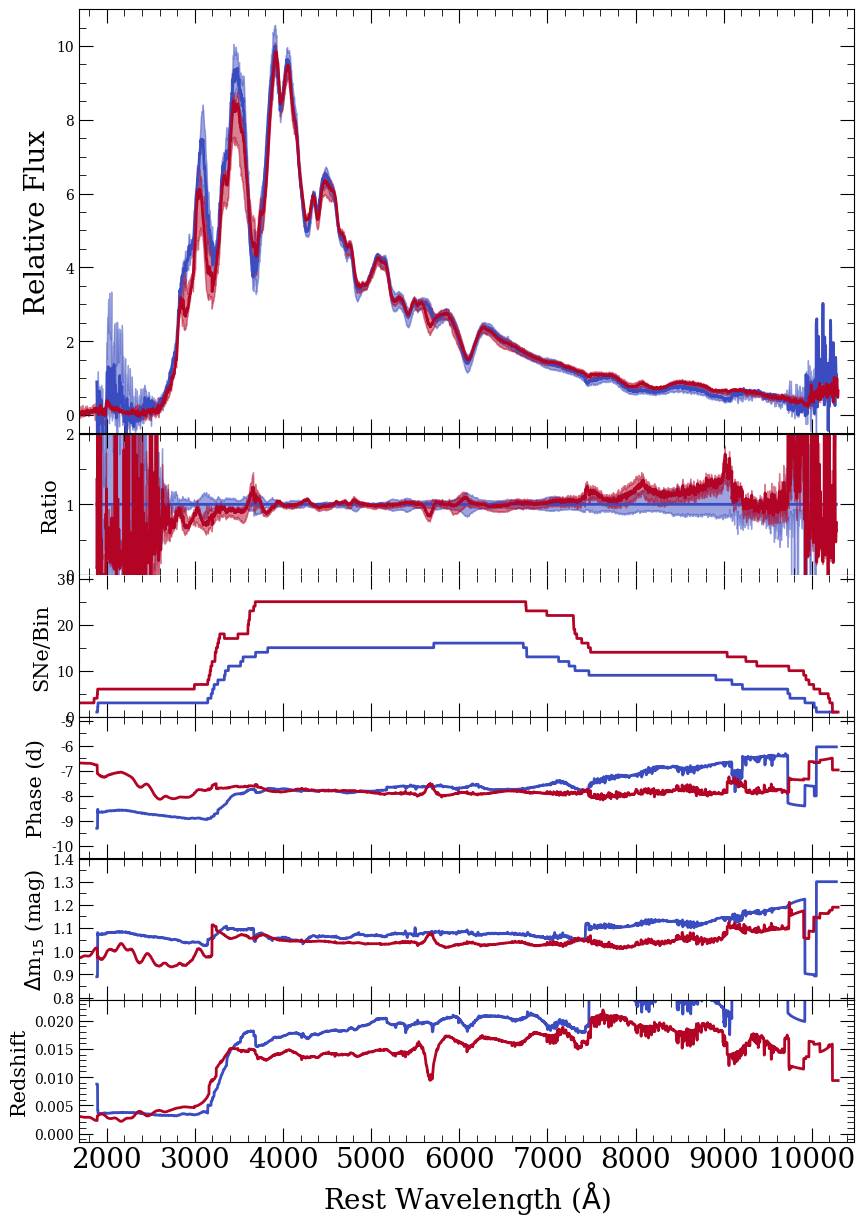

Phase:  -3.5965424343207406
dm15:  1.0912617088373797
Redshift:  0.023423765166696267
HR:  nan
Phase:  -4.119034444912944
dm15:  1.0480393691082557
Redshift:  0.01423434169922771
HR:  nan


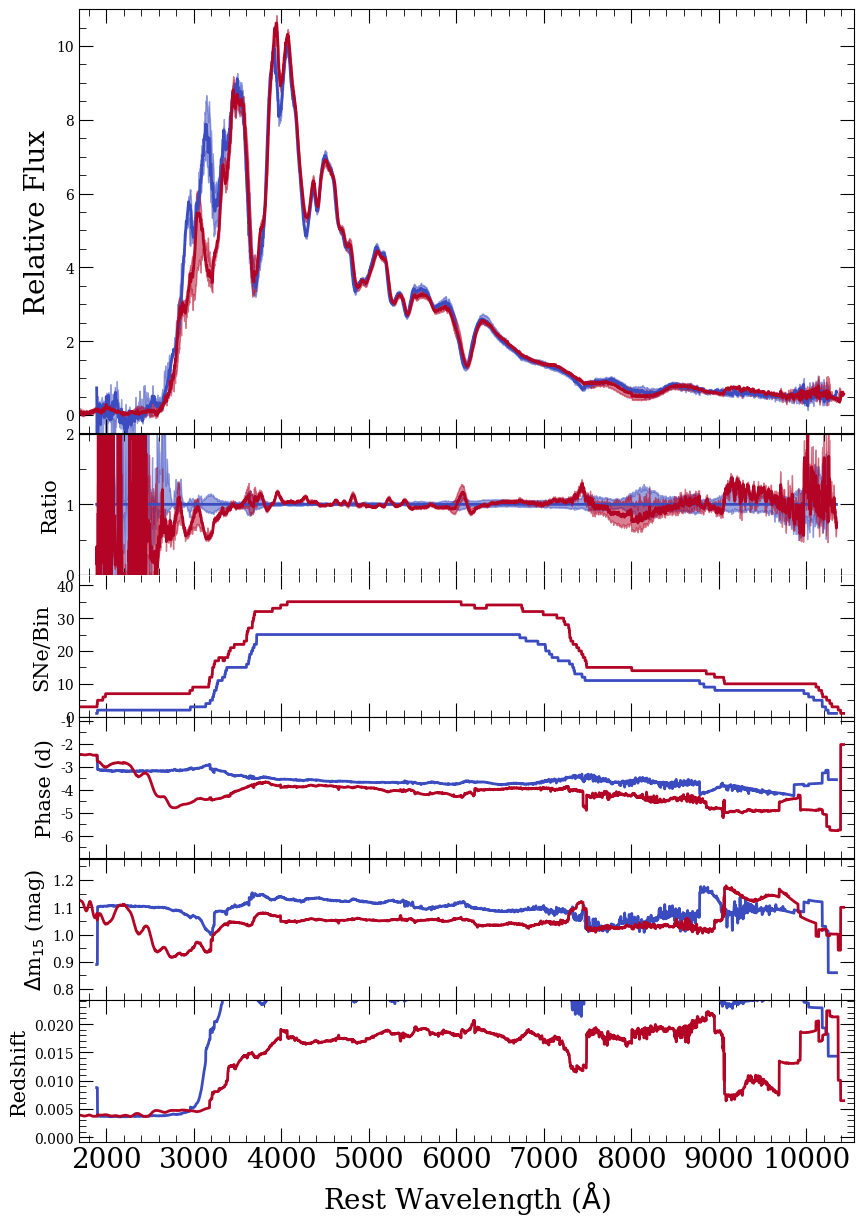

Phase:  0.07926655204189433
dm15:  1.1391745219673288
Redshift:  0.018219709338119595
HR:  nan
Phase:  0.0038382910927053696
dm15:  1.0651062254395498
Redshift:  0.011200301933758781
HR:  nan


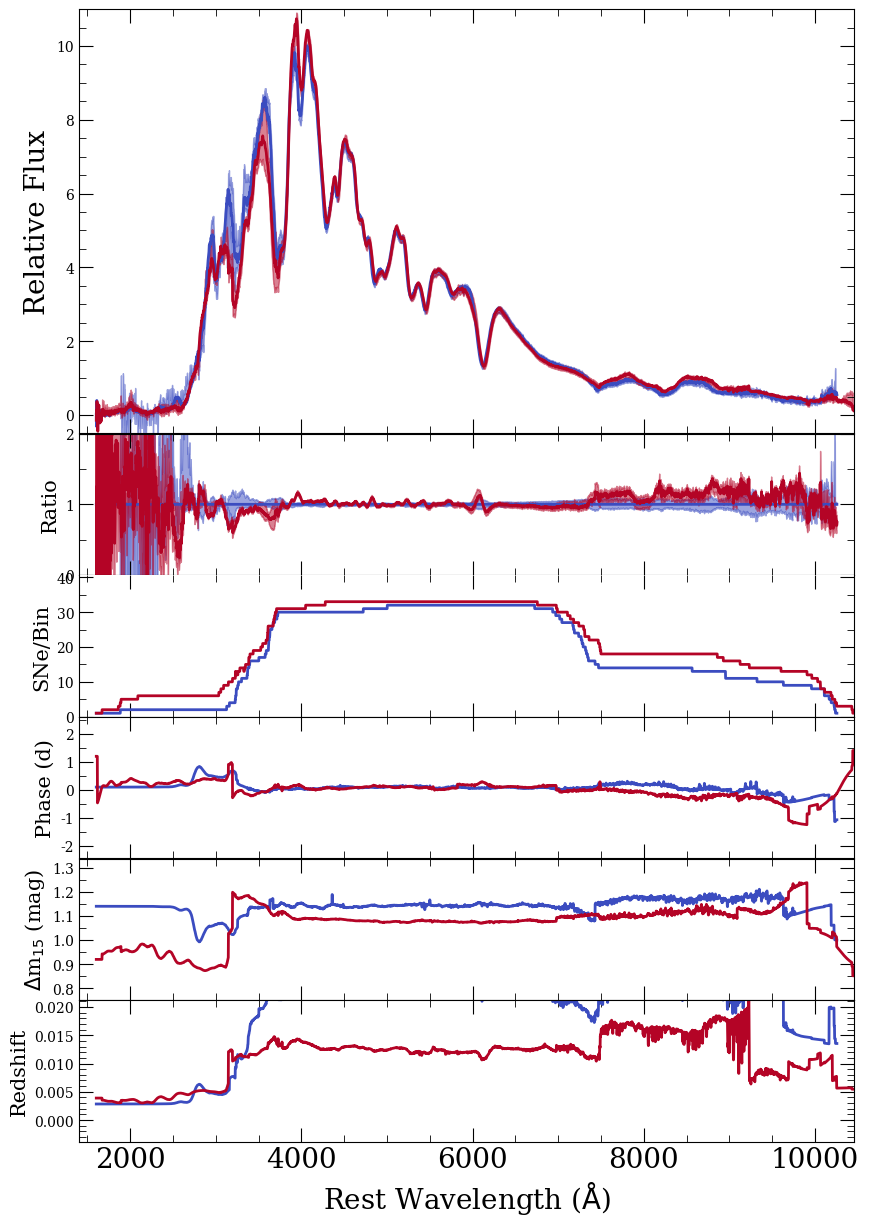

Phase:  3.403912548978616
dm15:  1.0881503803068993
Redshift:  0.0217300798466393
HR:  nan
Phase:  3.7292984898293797
dm15:  1.0854928295762636
Redshift:  0.009738960505808086
HR:  nan


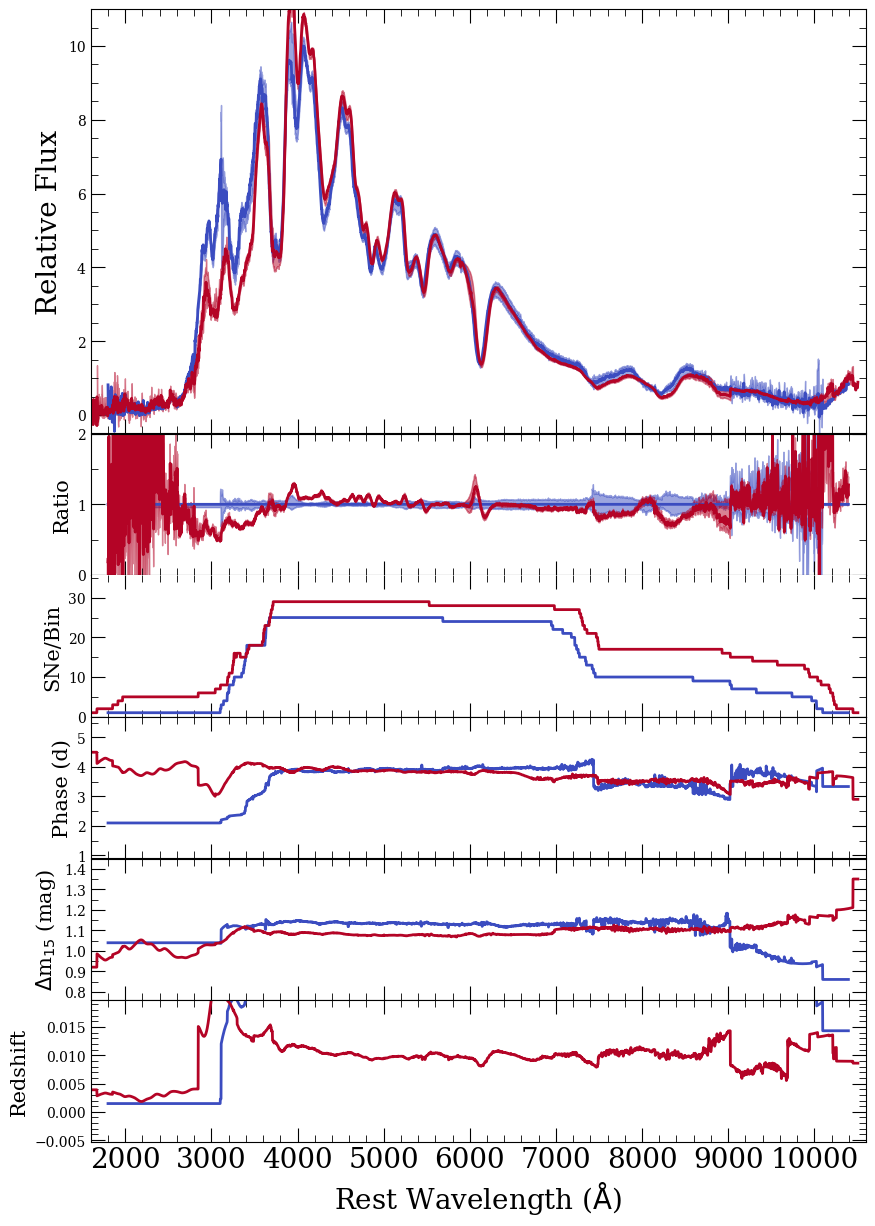

Phase:  7.736459540748885
dm15:  1.1131641325832147
Redshift:  0.025016380157527177
HR:  nan
Phase:  8.113413230981566
dm15:  1.0729785477055476
Redshift:  0.01191116768359797
HR:  nan


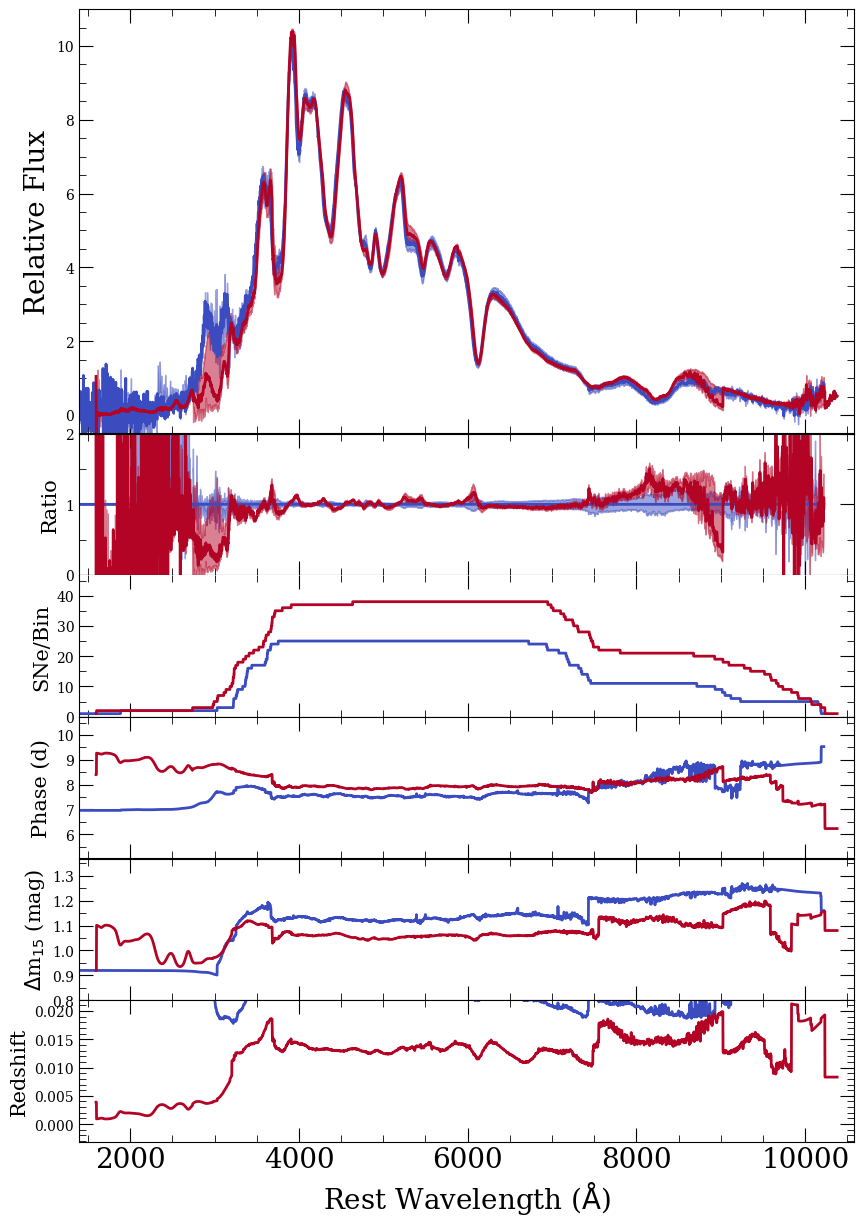

Phase:  12.08145370447929
dm15:  1.1455267484090503
Redshift:  0.023231329442936634
HR:  nan
Phase:  12.141306253718986
dm15:  1.029620144351177
Redshift:  0.01050996048693144
HR:  nan


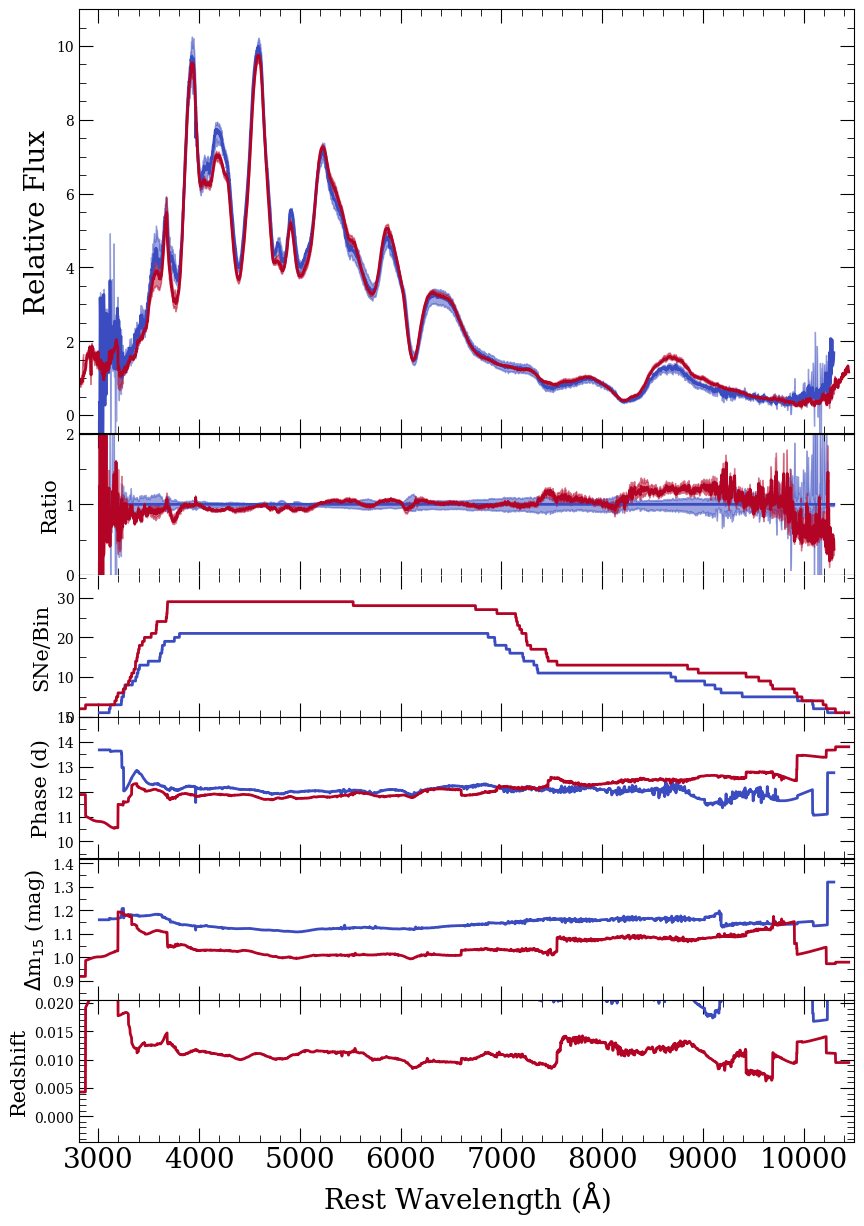

Phase:  15.682208998242068
dm15:  1.1156045780836912
Redshift:  0.028827890170362677
HR:  -0.05552670377602761
Phase:  16.009804225136374
dm15:  1.0418994843779934
Redshift:  0.010034796309142925
HR:  nan


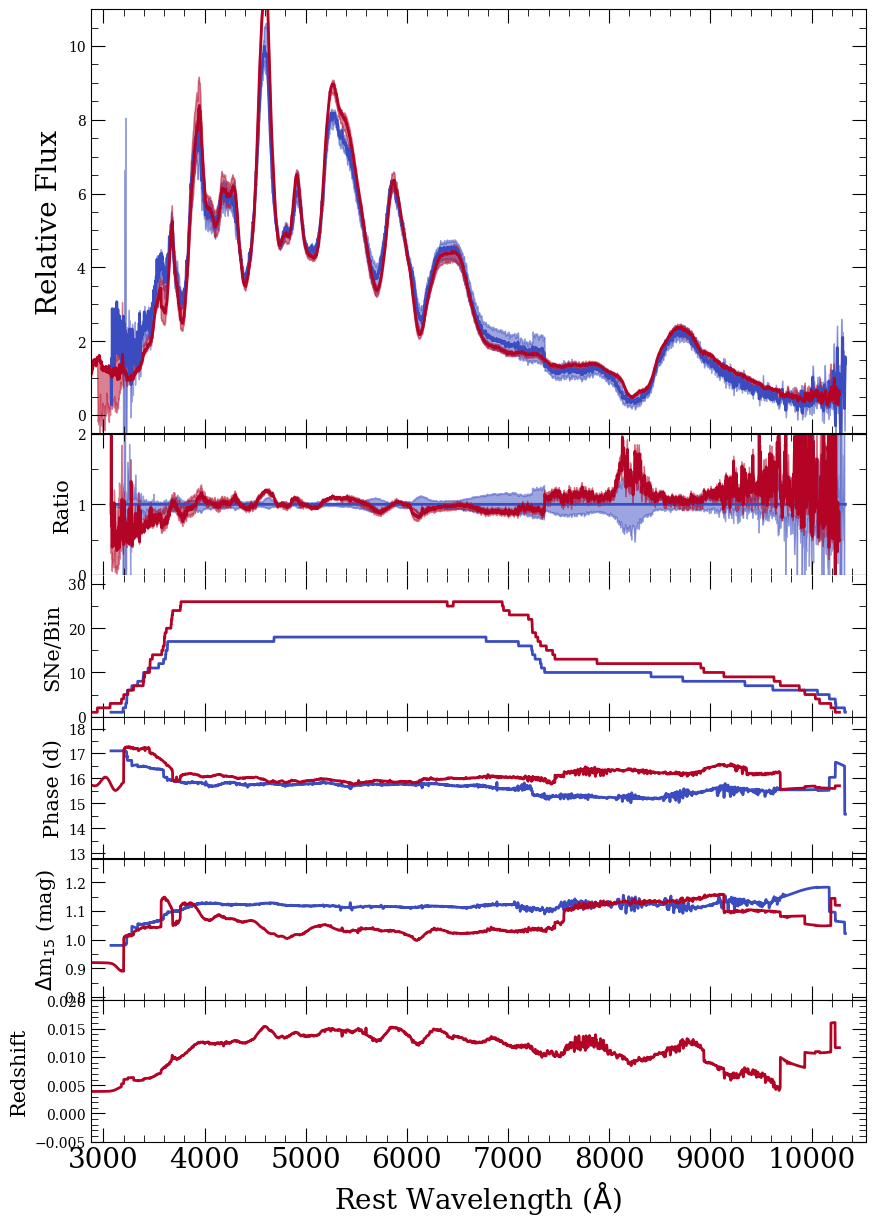

Phase:  19.308270775453934
dm15:  1.1041705195432188
Redshift:  0.023803927242060915
HR:  3.007404220562026e-05
Phase:  20.24447462198674
dm15:  1.0079365995861242
Redshift:  0.00964172867043755
HR:  nan


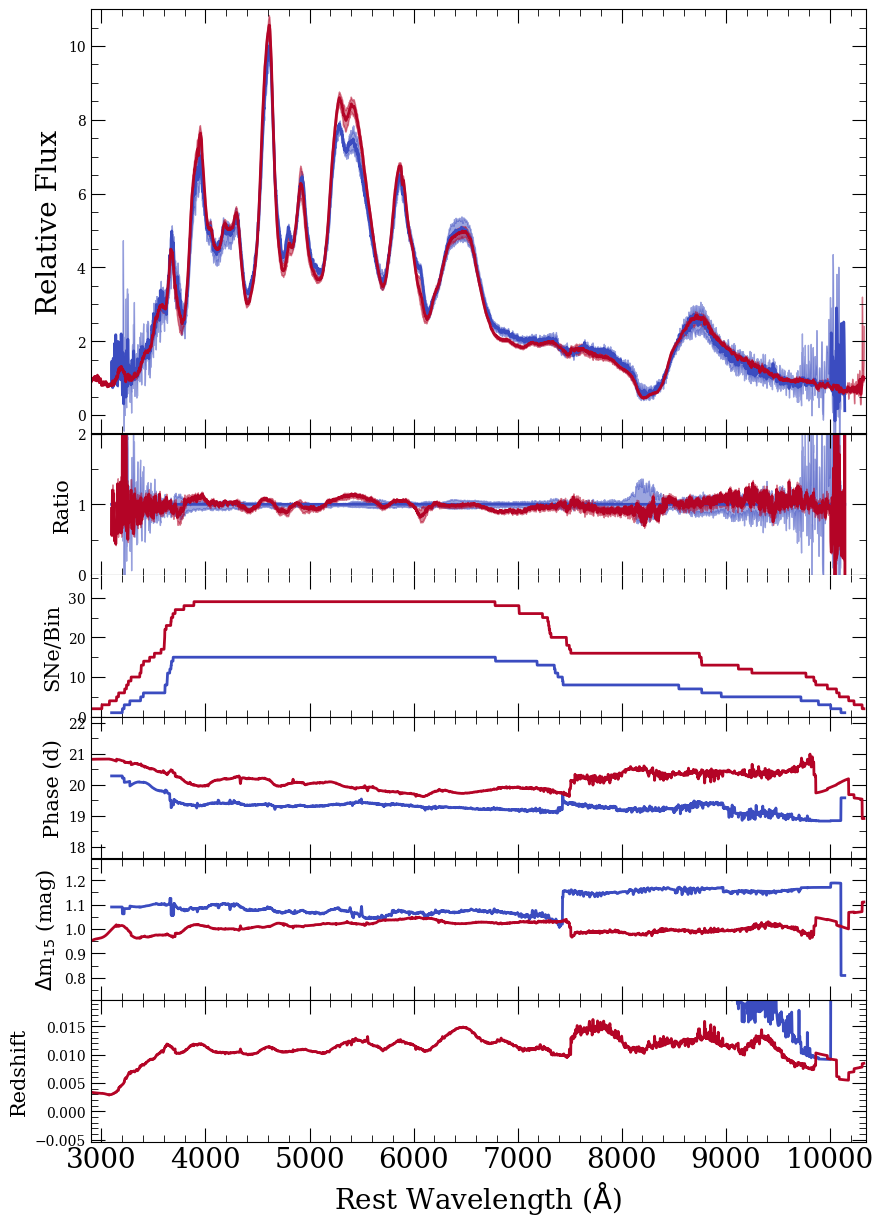

Phase:  24.158484508681045
dm15:  1.1226106090524617
Redshift:  0.02133034685553736
HR:  nan
Phase:  24.364232241015756
dm15:  1.0714430236277743
Redshift:  0.01504472067175448
HR:  nan


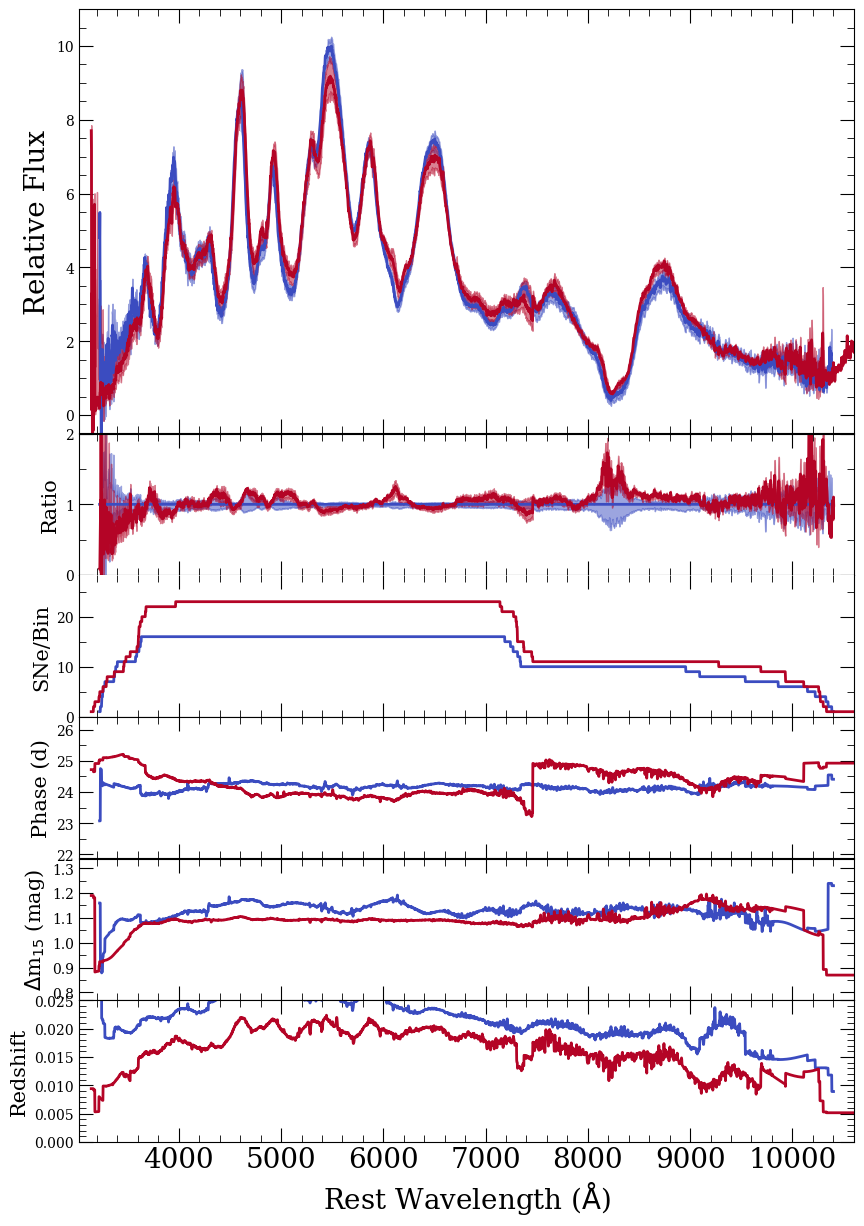

Phase:  27.846782677163795
dm15:  1.1110050573643735
Redshift:  0.018558966849844826
HR:  nan
Phase:  28.02440281679793
dm15:  1.0825965666551312
Redshift:  0.008374824122655895
HR:  nan


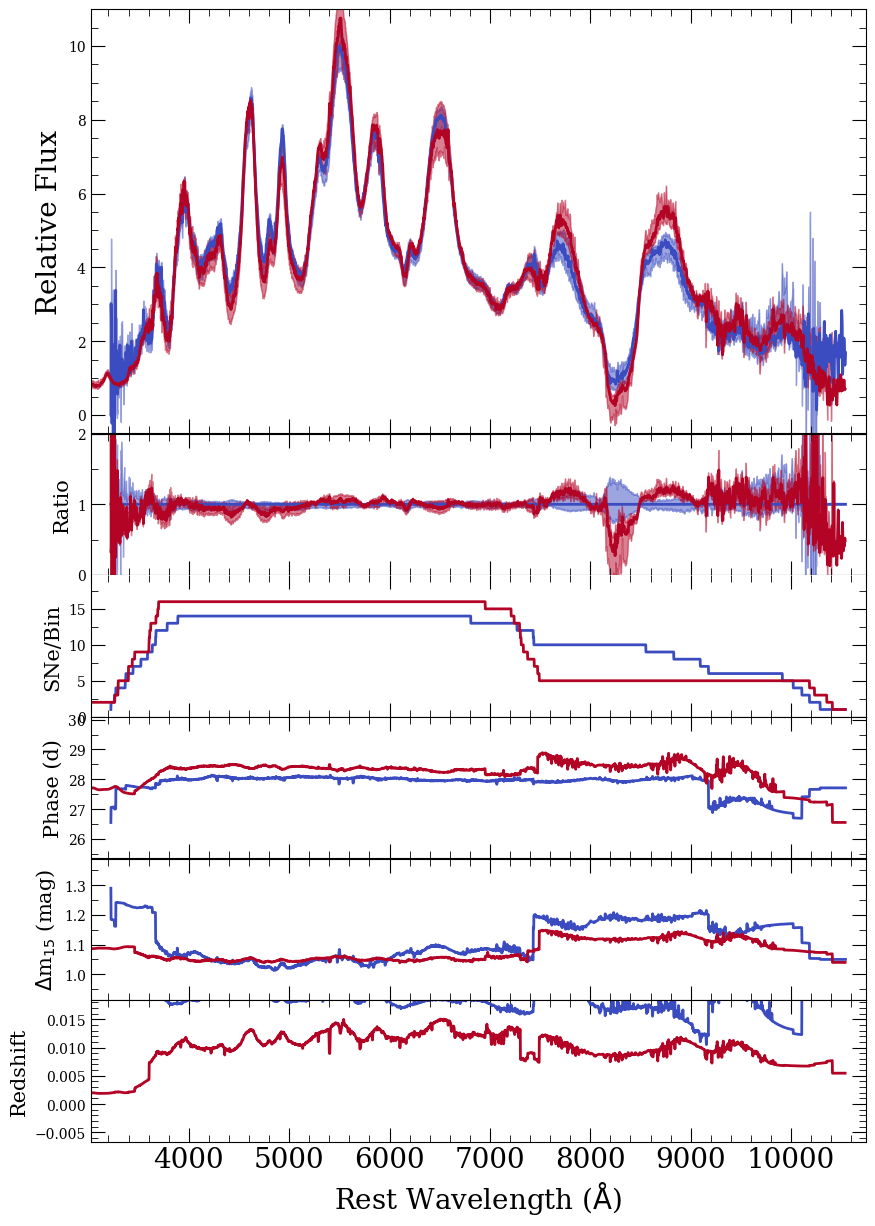

Phase:  31.553537416543545
dm15:  1.1867430280309648
Redshift:  0.02399352311561451
HR:  -0.08929072176656185
Phase:  32.278846529483026
dm15:  1.0682065952106377
Redshift:  0.011720889846803603
HR:  nan


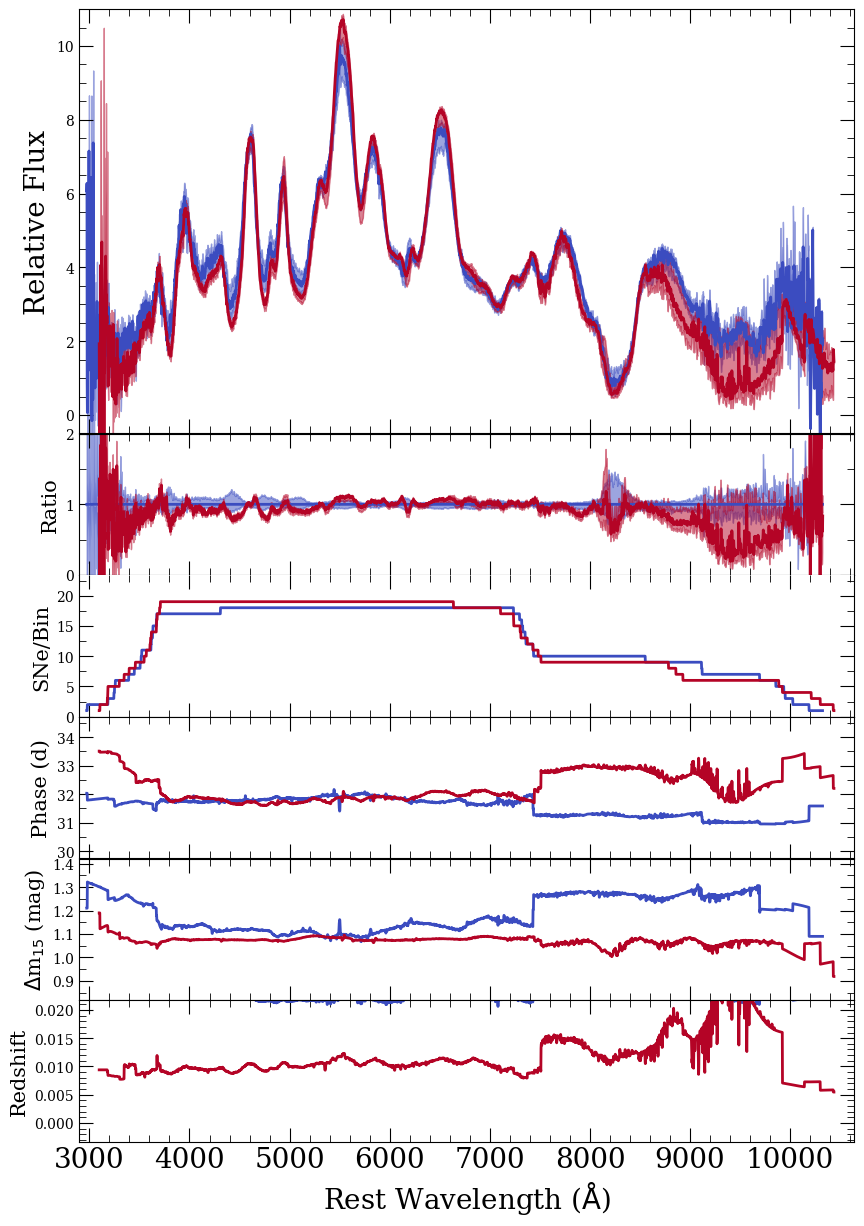

Phase:  36.074856152818555
dm15:  1.1592004565841139
Redshift:  0.02451098593364579
HR:  nan
Phase:  35.94590743976308
dm15:  1.1099870781421335
Redshift:  0.010274659885823158
HR:  nan


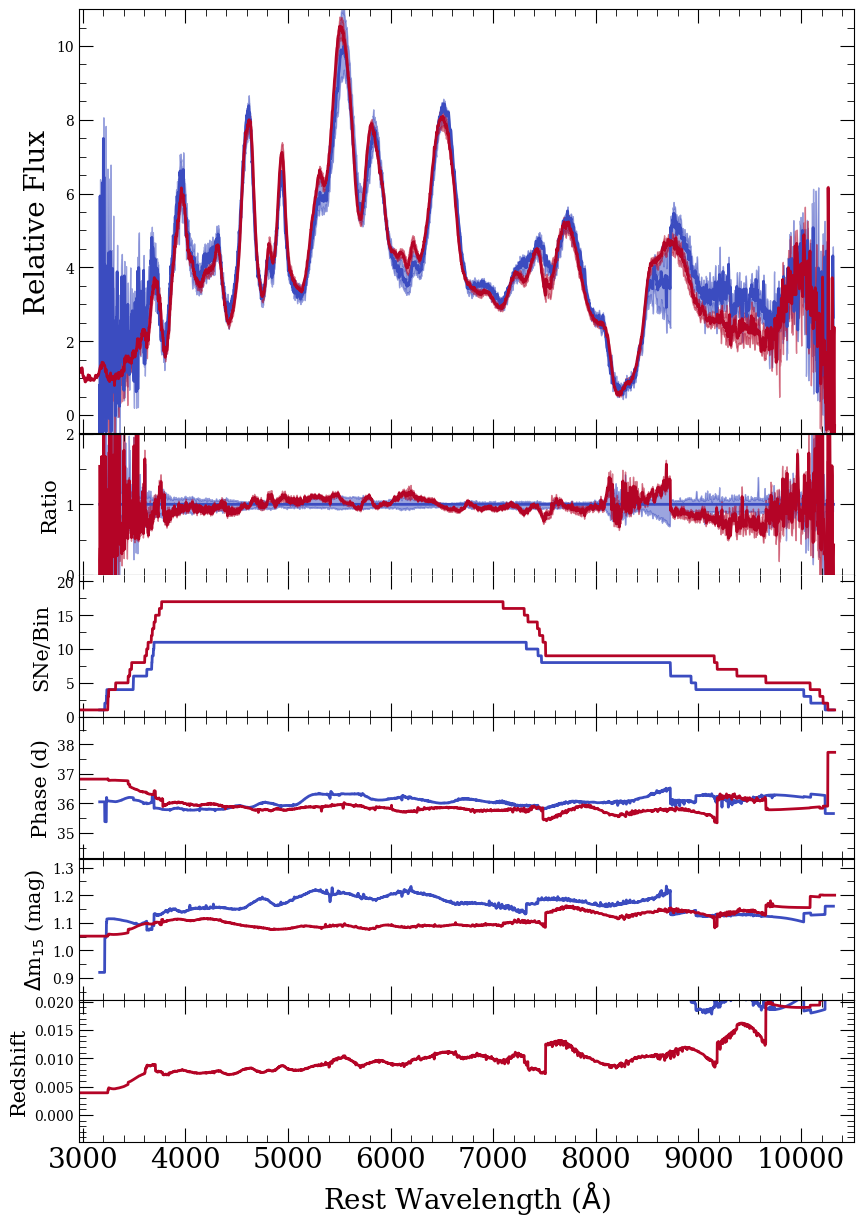

Phase:  39.9177962981573
dm15:  1.085942520281371
Redshift:  0.020703990889886188
HR:  -0.17630230120176044
Phase:  39.940498171119415
dm15:  1.0588815224651316
Redshift:  0.00948747935634967
HR:  nan


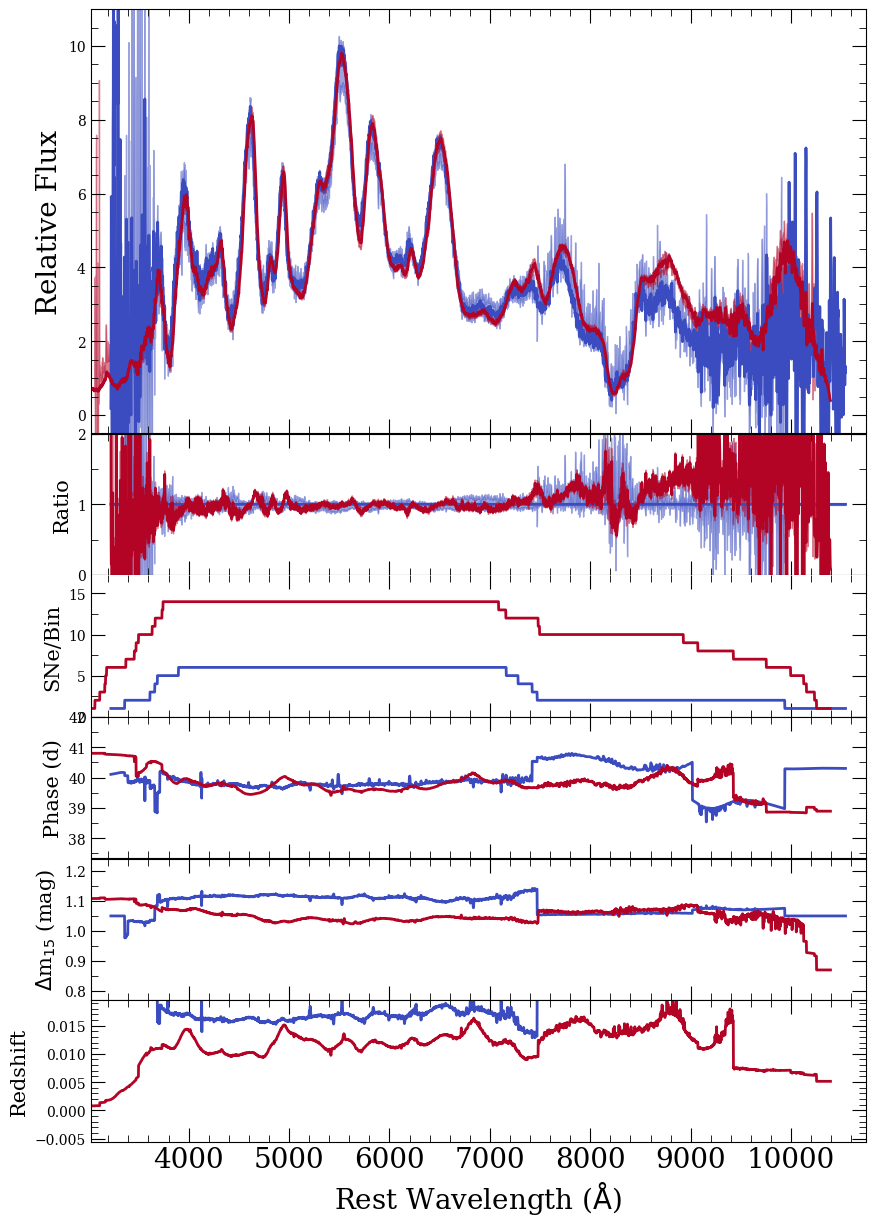

Phase:  44.75303158168924
dm15:  1.177531541743668
Redshift:  0.026707054250370902
HR:  -0.0072323394271872656
Phase:  44.10460126674657
dm15:  1.051225455344704
Redshift:  0.014293280822696276
HR:  nan


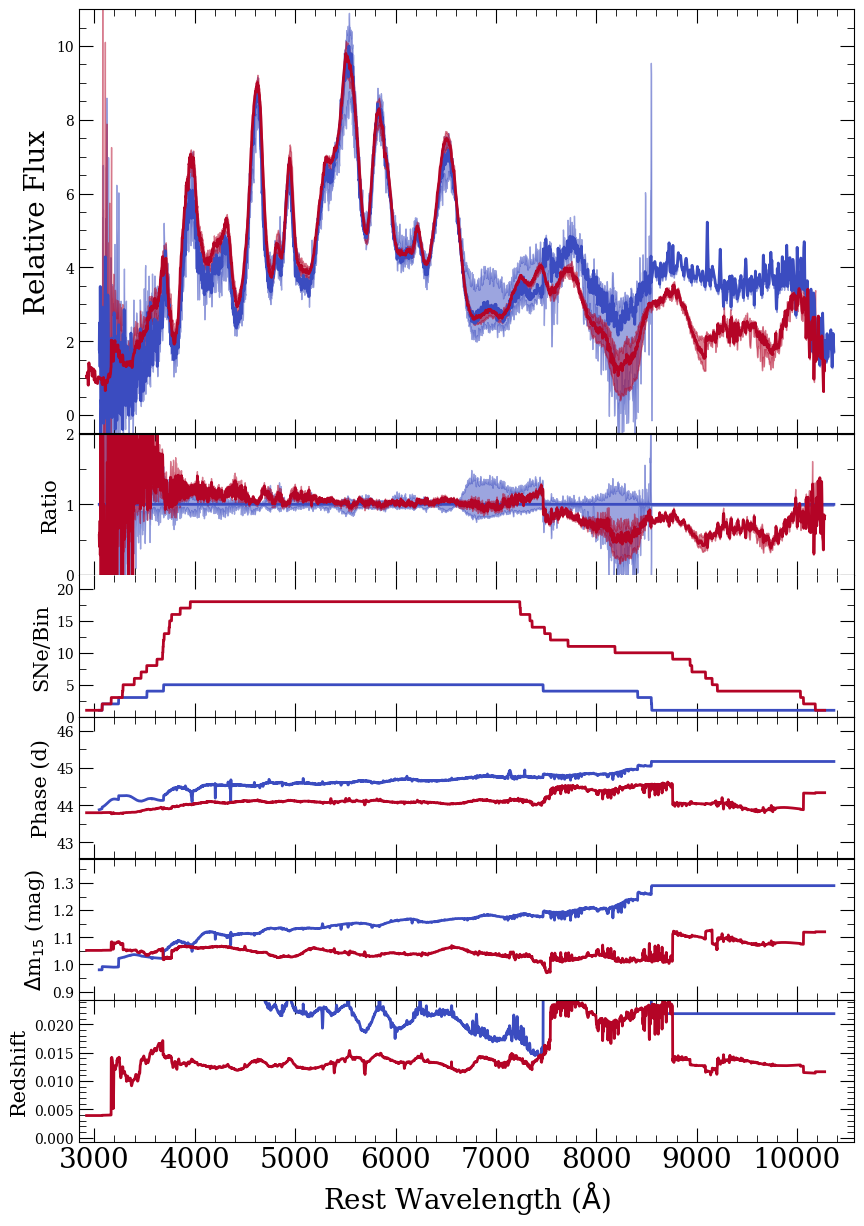

Phase:  47.06862528557001
dm15:  1.08408133300305
Redshift:  0.0117177737724655
HR:  nan
Phase:  48.60039950175048
dm15:  0.9997768488422303
Redshift:  0.01221007019181741
HR:  -0.07444628841406713


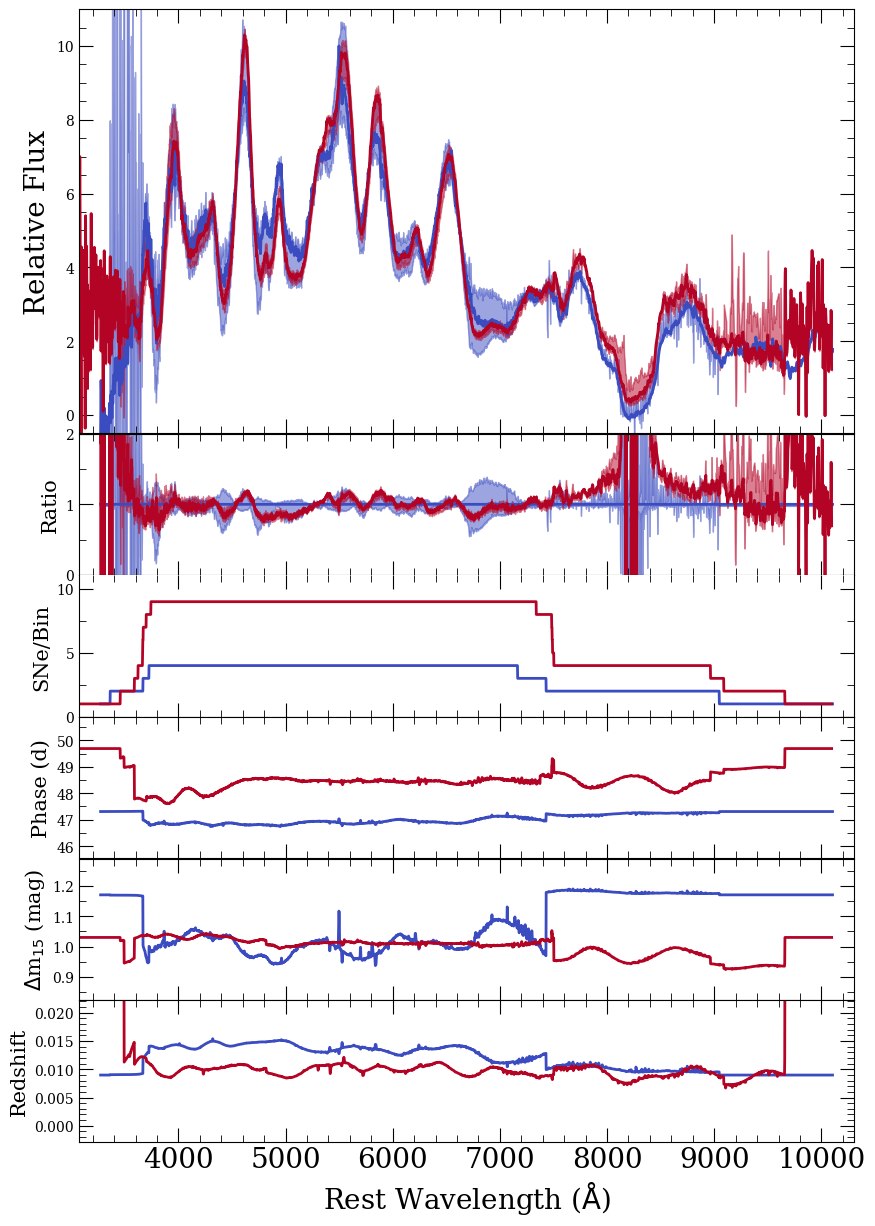

In [70]:
for i in range(len(composites_lowssfr)):
    comp_list = [composites_lowssfr[i], composites_highssfr[i]]
    kpora.set_min_num_spec(comp_list, 1)
    kplot.comparison_plot(comp_list, scale_type=False, min_num_show=1)

In [78]:
phases_lowssfr_1, comp_lowssfr_B_1, comp_lowssfr_V_1, errors_lowssfr_1 = sa.measure_comp_1m2(composites_lowssfr[1:-1], boot_arrs = boot_sn_arrays_lowssfr[1:-1], error=True)
phases_highssfr_1, comp_highssfr_B_1, comp_highssfr_V_1, errors_highssfr_1 = sa.measure_comp_1m2(composites_highssfr[1:-1], boot_arrs = boot_sn_arrays_highssfr[1:-1], error=True)


[1093 1094 1095 ... 4373 4374 4375]
[1093 1094 1095 ... 4589 4590 4591]
[1114 1115 1116 ... 4592 4593 4594]
[1092 1093 1094 ... 4482 4483 4484]
[1113 1114 1115 ... 4574 4575 4576]
[1117 1118 1119 ... 4466 4467 4468]
[1117 1118 1119 ... 4585 4586 4587]
[1189 1190 1191 ... 4359 4360 4361]
[1128 1129 1130 ... 4609 4610 4611]
[1184 1185 1186 ... 4508 4509 4510]
[1126 1127 1128 ... 4466 4467 4468]
[1247 1248 1249 ... 3985 3986 3987]
[1345 1346 1347 ... 3138 3139 3140]
[1345 1346 1347 ... 3233 3234 3235]


[ 447  448  449 ... 4591 4592 4593]
[ 449  450  451 ... 4632 4633 4634]
[ 447  448  449 ... 4614 4615 4616]
[ 485  486  487 ... 4609 4610 4611]
[ 997  998  999 ... 4536 4537 4538]
[1090 1091 1092 ... 4489 4490 4491]
[1101 1102 1103 ... 4516 4517 4518]
[1073 1074 1075 ... 4588 4589 4590]
[1114 1115 1116 ... 4632 4633 4634]
[1149 1150 1151 ... 4589 4590 4591]
[1093 1094 1095 ... 4459 4460 4461]
[1161 1162 1163 ... 4542 4543 4544]
[1087 1088 1089 ... 4560 4561 4562]
[1143 1144 1145 ... 4101 4102 4103]


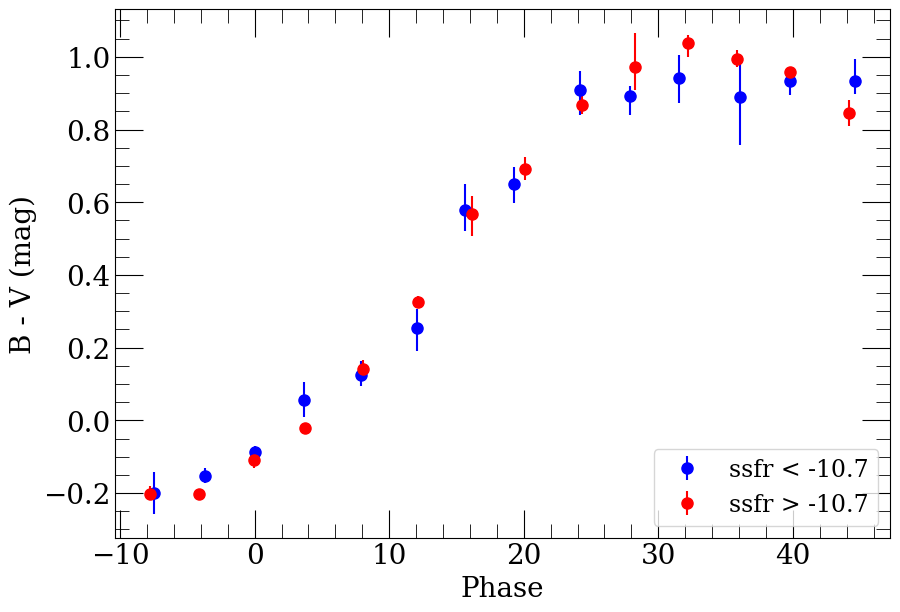

In [79]:
plt.rc('font', family='serif')
plt.figure(num = 1, dpi = 100, figsize = [10,7])
plt.minorticks_on()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Phase', fontsize = 20)
plt.ylabel('B - V (mag)', fontsize = 20)
plt.tick_params(
    which='major', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    direction='in',
    length=20)
plt.tick_params(
    which='minor', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    direction='in',
    length=10)
plt.errorbar(phases_lowssfr_1, np.asarray(comp_lowssfr_B_1)-np.asarray(comp_lowssfr_V_1), yerr=errors_lowssfr_1,fmt='o', markersize=8, color = 'blue', label='ssfr < -10.7')
plt.errorbar(phases_highssfr_1, np.asarray(comp_highssfr_B_1)-np.asarray(comp_highssfr_V_1), yerr=errors_highssfr_1, fmt='o', markersize=8, color = 'red', label='ssfr > -10.7')
plt.legend(loc=4, fontsize=17, numpoints=1)
# plt.savefig('../../Hubble_Residual_Paper/hr_color_curve.pdf', dpi = 300, bbox_inches = 'tight')
plt.show()

In [82]:
phases_lowssfr, comp_lowssfr_V, comp_lowssfr_i, errors_lowssfr = sa.measure_comp_1m2(composites_lowssfr[1:-1], filts = ['GROUND_JOHNSON_V','SDSS_i'], boot_arrs = boot_sn_arrays_lowssfr[1:-1], error=True)
phases_highssfr, comp_highssfr_V, comp_highssfr_i, errors_highssfr = sa.measure_comp_1m2(composites_highssfr[1:-1], filts = ['GROUND_JOHNSON_V','SDSS_i'], boot_arrs = boot_sn_arrays_highssfr[1:-1], error=True)


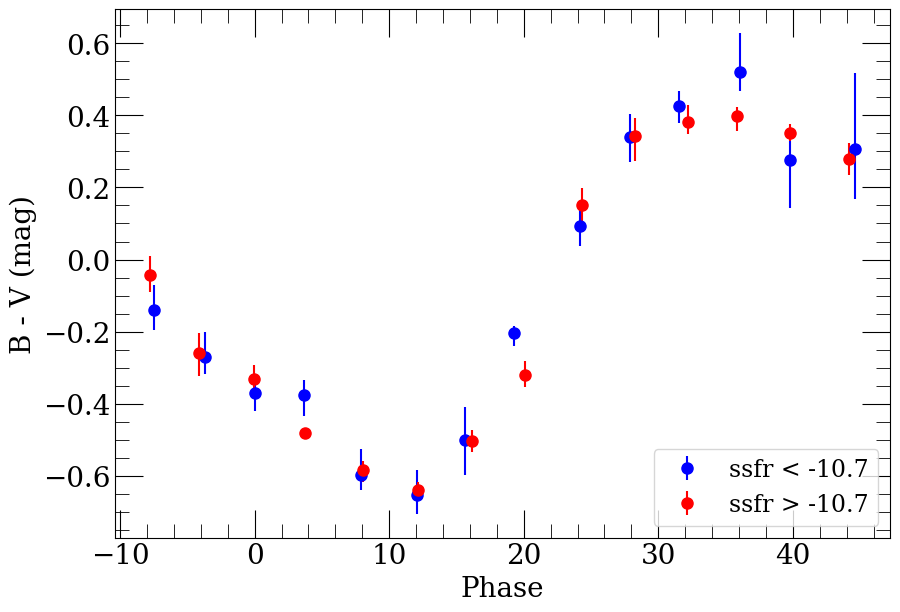

In [83]:
plt.rc('font', family='serif')
plt.figure(num = 1, dpi = 100, figsize = [10,7])
plt.minorticks_on()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Phase', fontsize = 20)
plt.ylabel('B - V (mag)', fontsize = 20)
plt.tick_params(
    which='major', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    direction='in',
    length=20)
plt.tick_params(
    which='minor', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    direction='in',
    length=10)
plt.errorbar(phases_lowssfr, np.asarray(comp_lowssfr_V)-np.asarray(comp_lowssfr_i), yerr=errors_lowssfr,fmt='o', markersize=8, color = 'blue', label='ssfr < -10.7')
plt.errorbar(phases_highssfr, np.asarray(comp_highssfr_V)-np.asarray(comp_highssfr_i), yerr=errors_highssfr, fmt='o', markersize=8, color = 'red', label='ssfr > -10.7')
plt.legend(loc=4, fontsize=17, numpoints=1)
# plt.savefig('../../Hubble_Residual_Paper/hr_color_curve.pdf', dpi = 300, bbox_inches = 'tight')
plt.show()

In [84]:
import spectral_analysis as sa

-11.549
-10.997415134434632
-11.388626576876426


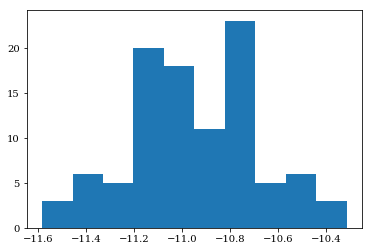

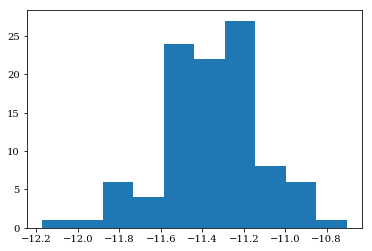

ERR:  0.2443223481581045
ERR:  0.19572397382958595
0 2005eq_combined -10.118919436719901
1 2003hu_combined -10.118919436719901
2 2011fe_combined -10.021456720684506
3 2005cf_combined -9.92402359558339
4 2004as_combined -11.486503345380463
5 1999ef_combined -10.704317028490788
6 2006ac_combined -12.565098143327868
7 2006ak_combined -11.192961724806997
8 2003du_combined -10.411485110219218
9 2002fk_combined -9.631901785684354
10 2006lu_combined -10.118919436719901
11 2007jg_combined -10.801986823599174
12 2002de_combined -10.997415134434632
13 2003fa_combined -9.92402359558339
14 1998ab_combined -9.145624102899788
15 2002dp_combined -9.729246126124085
16 1994ae_combined -10.704317028490788
17 1995al_combined -12.172468233516442
18 2002ha_combined -10.606676809804412
19 1990n -10.216411741678657
20 1994q -9.92402359558339
21 1997bp -14.041667214102862
22 2005hj -10.411485110219218
23 2006en -10.313933633529203
24 2007cq -10.313933633529203
25 1996c -10.313933633529203
26 1997bq -13.154928

In [92]:
p4_comps = [composites_highssfr[5],composites_lowssfr[5]]
p4_sn_arrs = [sn_arrays_highssfr[5], sn_arrays_lowssfr[5]]
p4_boots = [boot_sn_arrays_highssfr[5], boot_sn_arrays_lowssfr[5]]

p4_data = sa.measure_vels(p4_comps, p4_sn_arrs, 'globalssfr', boot_arrs = p4_boots, plot=False)

[-10.997415134434632, -11.388626576876426]


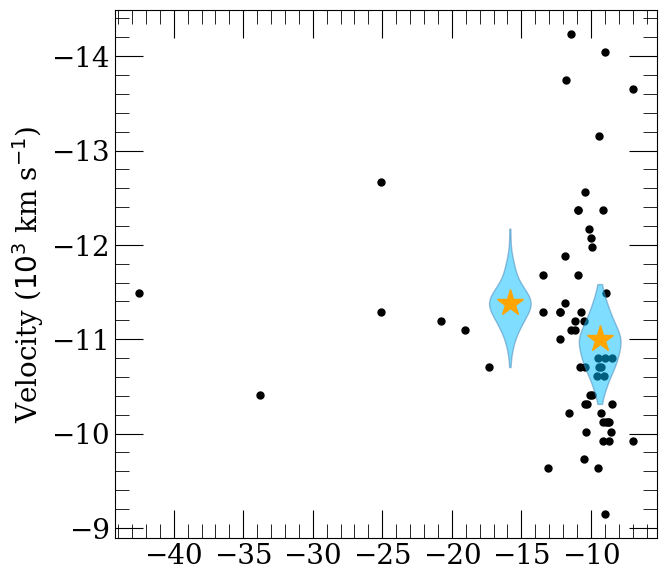

In [104]:
sa.plot_vels(p4_data, vwidth=3, savename=None)

In [102]:
for sn in p4_sn_arrs[1]:
    if sn.other_meta_data['globalssfr'] < -17:
        print sn.name, sn.other_meta_data['globalssfr']

2001eh_combined -17.31
1999gp -19.041
2005hc -20.774
2006bw -25.101
2008af -42.46
2008hv -33.782
2009ig -25.108
